Check

In [1172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('base_main.csv')
print(f'Data has {df.shape[0]} rows , {df.shape[1]} columns.')

Data has 11562 rows , 18 columns.


In [1173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11562 entries, 0 to 11561
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   author               11331 non-null  object 
 1   author_type          11331 non-null  object 
 2   url                  11562 non-null  object 
 3   location             11562 non-null  object 
 4   deal_type            11562 non-null  object 
 5   accommodation_type   11562 non-null  object 
 6   floor                11562 non-null  int64  
 7   floors_count         11562 non-null  int64  
 8   rooms_count          11562 non-null  int64  
 9   total_meters         11562 non-null  float64
 10  price_per_month      11562 non-null  int64  
 11  commissions          11562 non-null  int64  
 12  price                11477 non-null  float64
 13  district             5829 non-null   object 
 14  street               9119 non-null   object 
 15  house_number         10611 non-null 

4istka

In [1174]:
df.drop(['author_type', 'author', 'deal_type', 'accommodation_type', 'price_per_month', 'commissions', 'street'], axis=1,inplace=True)
print(f'Updt data has {df.shape[1]} columns.')

Updt data has 11 columns.


In [1175]:
new_order = [
      'location',
      'residential_complex', 
      'district', 
      # 'street', 
      'rooms_count', 
      'total_meters', 
      'floor', 
      'floors_count', 
      'underground',
      'price'
]


df = df[new_order]
df.head()

,location,residential_complex,district,rooms_count,total_meters,floor,floors_count,underground,price
0,Москва,Клубный город-парк,Хамовники,1,83.3,2,12,Фрунзенская,172590000.0
1,Москва,Прайм Парк,Хорошевский,1,41.5,9,40,ЦСКА,32000000.0
2,Москва,NaN,Чертаново Южное,1,33.5,11,12,Улица Академика Янгеля,8000000.0
3,Москва,Vesper Tverskaya,Тверской,1,57.6,8,9,Маяковская,117936000.0
4,Москва,Прайм Парк,Хорошевский,1,41.5,13,41,Аэропорт,31000000.0


In [1176]:
df.info()
print(f'\n\nData has {df.shape[0]} rows , {df.shape[1]} columns.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11562 entries, 0 to 11561
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             11562 non-null  object 
 1   residential_complex  7757 non-null   object 
 2   district             5829 non-null   object 
 3   rooms_count          11562 non-null  int64  
 4   total_meters         11562 non-null  float64
 5   floor                11562 non-null  int64  
 6   floors_count         11562 non-null  int64  
 7   underground          11303 non-null  object 
 8   price                11477 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 813.1+ KB


Data has 11562 rows , 9 columns.


location, residential_complex, district, underground, price

In [1177]:
def replace_nan_zhk(df, column):
      df[column] = df[column].fillna('Не указано')
      return df

def del_nan(df, column):
        df = df.dropna(subset=[column])
        return df

def replace_nan_discrit_rayon(df, column):
    if column in df.columns:
        for i in range(len(df)):
            if pd.isna(df.at[i, column]):  
                df.at[i, column] = df.at[i, 'underground'] 
            else:
                df[column] = df[column].fillna('Фрунзенская')

    return df

df = replace_nan_zhk(df, 'residential_complex')
df = replace_nan_discrit_rayon(df, 'district')
df = del_nan(df, 'underground')
df = del_nan(df, 'price')
df['price'] = df['price'].astype(int)

df['price_for_m'] = df['price'] // df['total_meters']
df['price_for_m'] = df['price_for_m'].astype(int)

proverka povtori

In [1178]:
num_dublicates = df.duplicated().sum()
print('Кол-во дубликатов: ', num_dublicates)

if num_dublicates >= 1:
      df.drop_duplicates(inplace=True)
      print(f'Колво удаления дублей: {df.shape[0]}')

Кол-во дубликатов:  271
Колво удаления дублей: 10952


proverka Null values

Number of Null values: location               0
residential_complex    0
district               0
rooms_count            0
total_meters           0
floor                  0
floors_count           0
underground            0
price                  0
price_for_m            0
dtype: int64


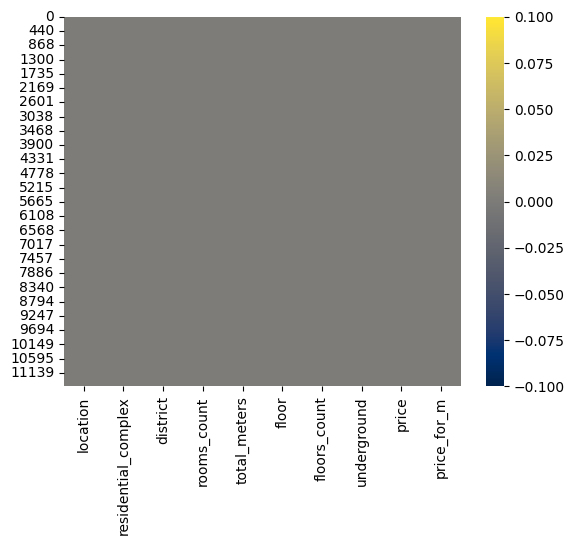

In [1179]:
sns.heatmap(df.isnull(),cmap='cividis')

num_nulls=df.isnull().sum()
print("Number of Null values:", num_nulls)

itog_4istka

In [1180]:
df.info()
print(f'\n\nData has {df.shape[0]} rows , {df.shape[1]} columns.')
df

df.to_csv('do_udt_base.csv', index=False, encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
Index: 10952 entries, 0 to 11561
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location             10952 non-null  object 
 1   residential_complex  10952 non-null  object 
 2   district             10952 non-null  object 
 3   rooms_count          10952 non-null  int64  
 4   total_meters         10952 non-null  float64
 5   floor                10952 non-null  int64  
 6   floors_count         10952 non-null  int64  
 7   underground          10952 non-null  object 
 8   price                10952 non-null  int64  
 9   price_for_m          10952 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 941.2+ KB


Data has 10952 rows , 10 columns.


** vyvod vsex kvar krome 1 (check)

In [1181]:
def filter_rooms_count_not_equal_to_one(df):
    filtered_df = df[df['rooms_count'] != 1] 
    return filtered_df

result_df = filter_rooms_count_not_equal_to_one(df)
# result_df